In [1]:
import glob
import pandas as pd
import scanpy as sc

def process_datasets(path, dataset_type, second_modality, excluded_datasets):
    datasets = glob.glob(path)
    # Filter out excluded datasets
    datasets = [d for d in datasets if not any(ex_name in d for ex_name in excluded_datasets)]
    total_cells = 0
    for data in datasets:
        try:
            # Open the file in backed mode without using 'with'
            adata = sc.read_h5ad(data, backed='r')
            n_cells, _ = adata.shape
            total_cells += n_cells
            print("finished: ", data)
        finally:
            # If the object has a file backing, close it manually
            if hasattr(adata, 'file'):
                adata.file.close()

    dataset_counts = len(datasets)

    return pd.DataFrame({
        'Dataset Type': [dataset_type],
        'Second Modality/Ground Truth': [second_modality],
        'Total Number of Cells': [total_cells],
        'Number of Datasets': [dataset_counts]
    })

# List of datasets to be excluded
excluded = [
    'ReplogleWeissman2022_K562_gwps.h5ad', 'SchiebingerLander2019_GSE115943.h5ad', 
    'FrangiehIzar2021_RNA.h5ad', 'McFarlandTsherniak2020.h5ad', 
    'TianKampmann2019_iPSC.h5ad', 'ReplogleWeissman2022_rpe1.h5ad', 
    'ReplogleWeissman2022_K562_essential.h5ad'
]


perturb_seq_path = "/Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/*.h5ad"
cite_seq_path = "/Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/*.h5ad"


perturb_seq_df = process_datasets(perturb_seq_path, 'Perturb-seq', 'Perturbation', excluded)
cite_seq_df = process_datasets(cite_seq_path, 'CITE-seq', 'Cell Surface Protein Expression', [])
combined_df = pd.concat([perturb_seq_df, cite_seq_df], ignore_index=True)


print(combined_df)


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/AdamsonWeissman2016_GSM2406681_10X010.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/PapalexiSatija2021_eccite_arrayed_RNA.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/PapalexiSatija2021_eccite_RNA.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/NormanWeissman2019_filtered.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/TianKampmann2021_CRISPRi.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/DatlingerBock2017.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/harmonized_perturb_datasets/SrivatsanTrapnell2020_sciplex4.h5ad
finished:  /Genomics/pritykinlab/yuj

/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/5k_pbmc_protein_v3_nextgem.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_14_BC14_AB14.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_02_BC2_AB2.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_DTC_kidney_lung_breast_TotalSeqC_multiplex_Breast_Cancer_BC3_AB3.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_07_BC7_AB7.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_DTC_kidney_lung_breast_TotalSeqC_multiplex_Kidney_Cancer2_BC2_AB2.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_mouse_LymphNode_Spleen_TotalSeqC_multiplex_Spleen2_BC4_AB4.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_12_BC12_AB12.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/pbmc_10k_protein_v3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_09_BC9_AB9.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/pbmc_1k_protein_v3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_06_BC6_AB6.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_16_BC16_AB16.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/5k_pbmc_protein_v3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_mouse_LymphNode_Spleen_TotalSeqC_multiplex_LymphNode1_BC1_AB1.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_10_BC10_AB10.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_08_BC8_AB8.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_11_BC11_AB11.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/5k_human_antiCMV_T_TBNK_connect_5k_human_antiCMV_T_TBNK_connect.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_15_BC15_AB15.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_DTC_kidney_lung_breast_TotalSeqC_multiplex_Kidney_Cancer1_BC1_AB1.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/10k_PBMC_TBNK_connect_10k_PBMC_TBNK_connect.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_mouse_LymphNode_Spleen_TotalSeqC_multiplex_LymphNode2_BC2_AB2.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/vdj_v1_hs_pbmc2_5gex_protein.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/malt_10k_protein_v3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_03_BC3_AB3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_05_BC5_AB5.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_13_BC13_AB13.h5ad


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/4plex_mouse_LymphNode_Spleen_TotalSeqC_multiplex_Spleen1_BC3_AB3.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_01_BC1_AB1.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/7k_melanoma_TBNK_connect_7k_melanoma_TBNK_connect.h5ad
finished:  /Genomics/pritykinlab/yujie/preprocessing_benchmarking/datasets/CITE_seq/10x_CITE_seq/h5ad/16plex_human_PBMC_TotalSeqC_multiplex_PBMC_04_BC4_AB4.h5ad
  Dataset Type     Second Modality/Ground Truth  Total Number of Cells  \
0  Perturb-seq                     Perturbation                1144202   
1     CITE-seq  Cell Surface Protein Expression                 269506   

   Number of Datasets  
0                  20  
1                  33  


/Genomics/argo/users/yq7946/.conda/envs/myenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


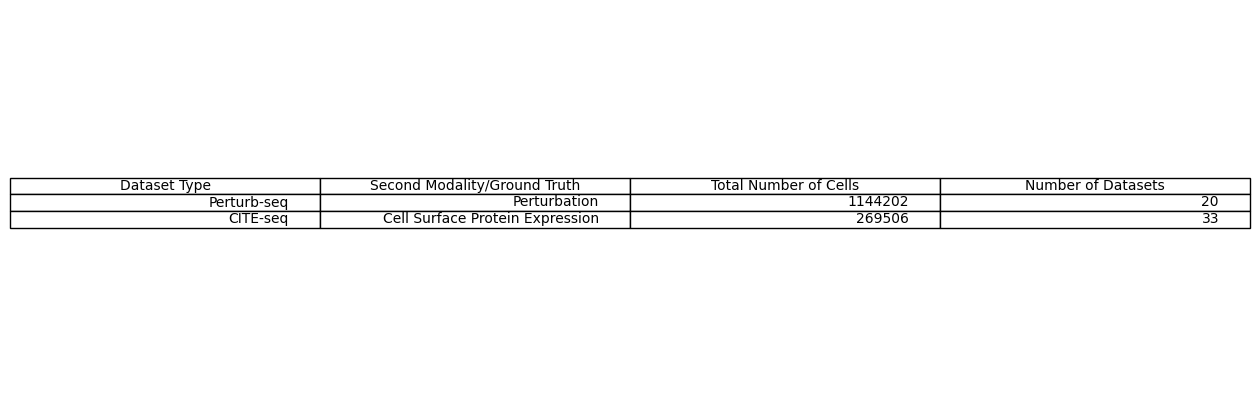

In [2]:
import matplotlib.pyplot as plt

# Plotting the DataFrame as a table
fig, ax = plt.subplots(figsize=(16, 5))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=combined_df.values, colLabels=combined_df.columns, loc='center')


plt.show()